In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/before_up_ETH3.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,ETH,up,2018-12-28 10:00:00,CryptoHourly,0,0,NaN,"@#3, Ethereum with unit price of $119.11, mark..."
1,ETH,up,2018-12-28 10:00:00,IAM__Network,0,0,#ethereum #profit #blockchain #fortune #IAMPla...,IAM Platform Curated Retweet: Via: https://twi...
2,ETH,up,2018-12-28 10:00:00,eth_hourly,0,0,#ethereum,"Current #ethereum price is $119.15, an increas..."
3,ETH,up,2018-12-28 10:00:01,CryptoShopUK,0,0,NaN,"Bitcoin @£3,127.33 | Ethereum @£103.61 | Litec..."
4,ETH,up,2018-12-28 10:00:02,coins_cat,0,0,#bitcoin #bitcoin #ethereum #cryptocurrency,"Bitcoinトランザクション状況 HashRate:4,940,732,073,953 ..."
...,...,...,...,...,...,...,...,...
1238,ETH,up,2018-12-28 15:58:42,santhosh121081,0,0,#Crypto #ether #ethereum #bitcoin #bitcoin #cr...,#Crypto #ether #ethereum #bitcoin #cryptocurrency
1239,ETH,up,2018-12-28 15:58:44,jkMaxi1,0,2,#FSTNetwork #FST #Blockchain #Ethereum #Interc...,Our Christmas Presents to all @ethereum and @b...
1240,ETH,up,2018-12-28 15:59:05,nup77JxCepzA7jI,3,3,#Read #Magazine #SouthAfrica #BlockchainGaming...,#Read in Techno #Magazine #SouthAfrica about t...
1241,ETH,up,2018-12-28 15:59:08,santhosh121081,0,0,#Crypto #ether #ethereum #bitcoin #bitcoin #cr...,#Crypto #ether #ethereum #bitcoin #cryptocurrency


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=x ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0       [@, 3, ,, ethereum, with, unit, price, of, $, ...
1       [iam, platform, curated, retweet, :, via, :, m...
2       [current, ethereum, price, is, $, 119.15, ,, a...
3       [bitcoin, @, £3,127.33, |, ethereum, @, £103.6...
4       [bitcoinトランザクション状況, hashrate:4,940,732,073,953...
                              ...                        
1238    [crypto, ether, ethereum, bitcoin, cryptocurre...
1239    [our, christmas, presents, to, all, @, ethereu...
1240    [read, in, techno, magazine, southafrica, abou...
1241    [crypto, ether, ethereum, bitcoin, cryptocurre...
1242    [i, liked, a, @, youtube, video, sac4ueodlg8, ...
Name: text, Length: 1243, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0       [,, ethereum, unit, price, $, ,, market, cap, ...
1       [iam, platform, curated, retweet, :, :, marco1...
2       [current, ethereum, price, $, ,, increase, +0....
3       [bitcoin, @, £3,127.33, |, ethereum, @, £103.6...
4       [bitcoinトランザクション状況, hashrate:4,940,732,073,953...
                              ...                        
1238          [crypto, ethereum, bitcoin, cryptocurrency]
1239    [christmas, presents, @, ethereum, @, block_on...
1240    [read, techno, magazine, southafrica, new, fan...
1241          [crypto, ethereum, bitcoin, cryptocurrency]
1242    [liked, @, youtube, video, sac4ueodlg8, ?, тех...
Name: text, Length: 1243, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [19]:
article_contents = tokenized_doc.values.tolist()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [21]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [22]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [23]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [24]:
word2id = defaultdict(lambda: 0)

In [25]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [26]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [27]:
len(tf_idf_result)

3249

In [28]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

3249


In [29]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [30]:
sentences = article_contents

In [31]:
from gensim.models import Word2Vec

In [32]:
model = Word2Vec(sentences, min_count=1)

In [33]:
len(model.wv.vocab)

3249

In [34]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [36]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [37]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [38]:
temp_cluster_result['cluster'] = assigned_clusters

In [39]:
temp_cluster_result['raw_data'] = X.tolist()

In [40]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [43]:
len(cosine_centroid_list)

3249

In [44]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [45]:
sum(temp_distance[3])

75.83257279720064

In [46]:
import scipy.spatial.distance as dist

In [47]:
dist.cosine(X[0],cosine_centroid_list[0])

7.937518365497276e-05

In [48]:
dist.euclidean(X[0],cosine_centroid_list[0])

3.0441834296713206

In [49]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [50]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [51]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2009,"[-0.0021364684216678143, 0.00850441213697195, ...",xblock,0,"[-0.0002509152, 0.00088381453, -0.0009210983, ...",0.110315,0.007264,1.103051,NaN
608,"[-0.0021831621415913105, -0.001363198505714535...",bitcashcoin,0,"[-0.0002509152, 0.00088381453, -0.0009210983, ...",0.176641,0.002075,1.174566,NaN
1358,"[-0.004939025267958641, -0.0031682937406003475...",icocoin,0,"[-0.0002509152, 0.00088381453, -0.0009210983, ...",0.512975,0.000519,1.512456,NaN
188,"[-0.002868147101253271, 0.004307141527533531, ...",anda,0,"[-0.0002509152, 0.00088381453, -0.0009210983, ...",0.655038,0.001038,1.654000,NaN
2589,"[-0.0026897641364485025, 0.0007411058177240193...",supplychain,0,"[-0.0002509152, 0.00088381453, -0.0009210983, ...",0.685590,0.000519,1.685071,NaN
1524,"[0.0006536215078085661, -0.004471758846193552,...",仮想通貨の時価総額,0,"[-0.0002509152, 0.00088381453, -0.0009210983, ...",0.714798,0.000519,1.714279,NaN
1253,"[0.003966162446886301, 0.0051361010409891605, ...",shock,0,"[-0.0002509152, 0.00088381453, -0.0009210983, ...",0.717134,0.000519,1.716616,NaN
2555,"[-0.003890042193233967, -0.0006007464835420251...",bitcoin_cash,0,"[-0.0002509152, 0.00088381453, -0.0009210983, ...",0.718455,0.000519,1.717936,NaN
1366,"[-3.119666871498339e-05, -0.000768845202401280...",shoot,0,"[-0.0002509152, 0.00088381453, -0.0009210983, ...",0.721043,0.000519,1.720524,NaN
563,"[-0.004563589580357075, 0.003398772794753313, ...",waht,0,"[-0.0002509152, 0.00088381453, -0.0009210983, ...",0.727579,0.000519,1.727061,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1054,"[0.005022474564611912, -0.004451473709195852, ...",fight,1,"[0.0004019612, -0.0009555087, 0.0020848424, -0...",0.071113,0.001038,1.070075,NaN
1983,"[0.001992055680602789, 0.0006234289612621069, ...",technews,1,"[0.0004019612, -0.0009555087, 0.0020848424, -0...",0.077413,0.000519,1.076894,NaN
1367,"[0.005438257474452257, -0.0018732186872512102,...",difference,1,"[0.0004019612, -0.0009555087, 0.0020848424, -0...",0.082230,0.001038,1.081193,NaN
3034,"[0.003986317198723555, -0.002840672852471471, ...",neerwaartse,1,"[0.0004019612, -0.0009555087, 0.0020848424, -0...",0.082882,0.001038,1.081844,NaN
2028,"[0.00022671472106594592, -0.001293825218454003...",zygote_incubus,1,"[0.0004019612, -0.0009555087, 0.0020848424, -0...",0.090092,0.001038,1.089055,NaN
2230,"[0.0029326353687793016, -0.00268410868011415, ...",blockstack,1,"[0.0004019612, -0.0009555087, 0.0020848424, -0...",0.095910,0.000519,1.095391,NaN
1842,"[0.00470318365842104, -0.0041854833252727985, ...",spot,1,"[0.0004019612, -0.0009555087, 0.0020848424, -0...",0.098547,0.001038,1.097509,NaN
2055,"[0.005729333963245153, -0.0017836737679317594,...",yerini,1,"[0.0004019612, -0.0009555087, 0.0020848424, -0...",0.104304,0.000519,1.103786,NaN
2604,"[0.0016749061178416014, 0.0017969897016882896,...",criticize,1,"[0.0004019612, -0.0009555087, 0.0020848424, -0...",0.105380,0.001038,1.104342,NaN
2972,"[-0.0016623076517134905, -0.002232502680271864...",ind_cryptonator,1,"[0.0004019612, -0.0009555087, 0.0020848424, -0...",0.106050,0.000519,1.105531,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2184,"[0.0016382724279537797, -0.003443558467552066,...",contra,2,"[0.00044939292, -0.000877671, 0.00088073, -0.0...",0.047033,0.000519,1.046515,NaN
2036,"[0.0004504338139668107, -0.0004852707497775554...",adventure,2,"[0.00044939292, -0.000877671, 0.00088073, -0.0...",0.049059,0.000519,1.048540,NaN
1476,"[-0.0011448473669588566, -0.002847042167559266...",kopen,2,"[0.00044939292, -0.000877671, 0.00088073, -0.0...",0.053990,0.001038,1.052953,NaN
2354,"[3.1840263545745984e-05, -0.000925721018575131...",ripplexrp,2,"[0.00044939292, -0.000877671, 0.00088073, -0.0...",0.060910,0.000519,1.060391,NaN
2264,"[0.002343261381611228, 0.0017445110715925694, ...",worthy,2,"[0.00044939292, -0.000877671, 0.00088073, -0.0...",0.061182,0.000519,1.060664,NaN
1564,"[0.0004954739124514163, 0.002312382450327277, ...",internet,2,"[0.00044939292, -0.000877671, 0.00088073, -0.0...",0.072784,0.001038,1.071747,NaN
203,"[0.002223659073933959, -0.005939490627497435, ...",github,2,"[0.00044939292, -0.000877671, 0.00088073, -0.0...",0.075014,0.001038,1.073977,NaN
2811,"[0.005064388271421194, -0.003734428435564041, ...",ethusd,2,"[0.00044939292, -0.000877671, 0.00088073, -0.0...",0.076412,0.002075,1.074337,NaN
2106,"[0.005239390302449465, -0.0036115976981818676,...",nedir,2,"[0.00044939292, -0.000877671, 0.00088073, -0.0...",0.076640,0.000519,1.076121,NaN
775,"[-0.0016331723891198635, -0.006261870265007019...",tarafından,2,"[0.00044939292, -0.000877671, 0.00088073, -0.0...",0.076767,0.000519,1.076248,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[0.05945112556219101, -0.12784969806671143, 0....",ethereum,3,"[0.002238189, -0.005448286, 0.00949396, -0.004...",0.000079,0.741985,0.258094,NaN
16,"[0.03615323081612587, -0.09573262929916382, 0....",bitcoin,3,"[0.002238189, -0.005448286, 0.00949396, -0.004...",0.000207,0.449861,0.550346,NaN
9,"[0.03977722302079201, -0.08266688138246536, 0....",blockchain,3,"[0.002238189, -0.005448286, 0.00949396, -0.004...",0.000170,0.231935,0.768235,NaN
38,"[0.038989897817373276, -0.08542847633361816, 0...",crypto,3,"[0.002238189, -0.005448286, 0.00949396, -0.004...",0.000115,0.215850,0.784265,NaN
21,"[0.03468145802617073, -0.07114368677139282, 0....",cryptocurrency,3,"[0.002238189, -0.005448286, 0.00949396, -0.004...",0.000193,0.187831,0.812362,NaN
64,"[0.025909945368766785, -0.07053964585065842, 0...",ripple,3,"[0.002238189, -0.005448286, 0.00949396, -0.004...",0.000365,0.111557,0.888808,NaN
2,"[0.029290882870554924, -0.05248430371284485, 0...",price,3,"[0.002238189, -0.005448286, 0.00949396, -0.004...",0.000659,0.098585,0.902074,NaN
17,"[0.021767837926745415, -0.04672897607088089, 0...",litecoin,3,"[0.002238189, -0.005448286, 0.00949396, -0.004...",0.000491,0.094953,0.905537,NaN
110,"[0.023814674466848373, -0.05909958481788635, 0...",airdrop,3,"[0.002238189, -0.005448286, 0.00949396, -0.004...",0.001269,0.092878,0.908391,NaN
47,"[0.031898170709609985, -0.0689939633011818, 0....",news,3,"[0.002238189, -0.005448286, 0.00949396, -0.004...",0.000208,0.071604,0.928604,NaN


In [55]:
y_km = temp_cluster_result['cluster'].values

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

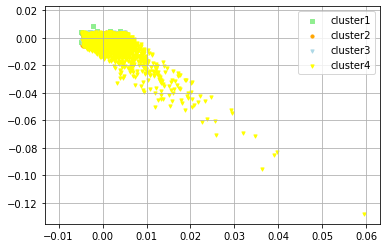

In [57]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 투자

32

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 인플

360

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 비즈

480

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 거래소

2377

In [62]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [63]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [64]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 11 # 투자

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 6 # 인플

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 7 # 비즈

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 12 # 거래소

In [68]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [69]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [70]:
kmeans.inertia_

16.328168869018555

In [71]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[1 0 1 ... 0 0 0]


In [72]:
cluster_values= list(model.wv.vocab)

In [73]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-16.328168869018555


In [74]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [75]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.6634849


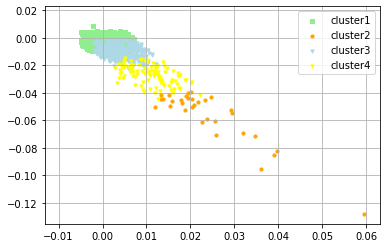

In [76]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [77]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [78]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [79]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [80]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [81]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [82]:
import scipy.spatial.distance as dist

In [83]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [84]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [85]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
665,"[-0.0016645981231704354, -0.003828986547887325...",consist,0,"[0.0008049359, -0.001949782, 0.0032998621, -0....",0.024576,0.001038,1.023538,NaN
1602,"[0.0008644177578389645, 0.00019943725783377886...",welcomeu,0,"[0.0008049359, -0.001949782, 0.0032998621, -0....",0.024255,0.000519,1.023737,NaN
1460,"[-0.0006165530649013817, -0.001853196648880839...",handle,0,"[0.0008049359, -0.001949782, 0.0032998621, -0....",0.024594,0.000519,1.024075,NaN
973,"[-0.00013161730021238327, 0.001188863767310977...",vaultmex,0,"[0.0008049359, -0.001949782, 0.0032998621, -0....",0.026451,0.002075,1.024376,NaN
3029,"[0.002443922683596611, -0.002596555044874549, ...",thin,0,"[0.0008049359, -0.001949782, 0.0032998621, -0....",0.025605,0.001038,1.024567,NaN
1370,"[0.000811074860394001, -0.003320185234770179, ...",coinprices,0,"[0.0008049359, -0.001949782, 0.0032998621, -0....",0.025384,0.000519,1.024865,NaN
633,"[0.002835591323673725, -0.003588890191167593, ...",créer,0,"[0.0008049359, -0.001949782, 0.0032998621, -0....",0.025538,0.000519,1.025019,NaN
2641,"[0.0003216695913579315, -0.0012481565354391932...",serán,0,"[0.0008049359, -0.001949782, 0.0032998621, -0....",0.025570,0.000519,1.025051,NaN
1746,"[-0.0025917543098330498, -0.000643676787149161...",coinsentapp,0,"[0.0008049359, -0.001949782, 0.0032998621, -0....",0.026166,0.001038,1.025129,NaN
1745,"[0.001189964939840138, -0.001551114022731781, ...",coinsent,0,"[0.0008049359, -0.001949782, 0.0032998621, -0....",0.026371,0.001038,1.025333,NaN


In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(50,'score') # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
110,"[0.023814674466848373, -0.05909958481788635, 0...",airdrop,1,"[0.023766661, -0.056118477, 0.09910599, -0.050...",0.079649,0.092878,0.986771,NaN
177,"[0.01882902905344963, -0.05223245173692703, 0....",token,1,"[0.023766661, -0.056118477, 0.09910599, -0.050...",0.032272,0.044623,0.987649,NaN
2,"[0.029290882870554924, -0.05248430371284485, 0...",price,1,"[0.023766661, -0.056118477, 0.09910599, -0.050...",0.104136,0.098585,1.005550,NaN
282,"[0.029409464448690414, -0.054618291556835175, ...",transaction,1,"[0.023766661, -0.056118477, 0.09910599, -0.050...",0.040427,0.027500,1.012927,NaN
115,"[0.025490829721093178, -0.060288671404123306, ...",exchange,1,"[0.023766661, -0.056118477, 0.09910599, -0.050...",0.062013,0.040472,1.021541,NaN
289,"[0.02263997495174408, -0.060980819165706635, 0...",project,1,"[0.023766661, -0.056118477, 0.09910599, -0.050...",0.087380,0.030094,1.057286,NaN
64,"[0.025909945368766785, -0.07053964585065842, 0...",ripple,1,"[0.023766661, -0.056118477, 0.09910599, -0.050...",0.189592,0.111557,1.078034,NaN
111,"[0.0153097715228796, -0.04949614033102989, 0.0...",join,1,"[0.023766661, -0.056118477, 0.09910599, -0.050...",0.135369,0.046698,1.088671,NaN
532,"[0.020252306014299393, -0.05031445994973183, 0...",network,1,"[0.023766661, -0.056118477, 0.09910599, -0.050...",0.139789,0.032689,1.107100,NaN
187,"[0.013733213767409325, -0.04446374252438545, 0...",sell,1,"[0.023766661, -0.056118477, 0.09910599, -0.050...",0.161473,0.032689,1.128784,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
22,"[0.0017034863121807575, -0.008924716152250767,...",仮想通貨,2,"[0.0042407517, -0.010123883, 0.017732682, -0.0...",0.028639,0.007783,1.020856,NaN
678,"[0.005277447868138552, -0.011169794015586376, ...",check,2,"[0.0042407517, -0.010123883, 0.017732682, -0.0...",0.028729,0.006745,1.021983,NaN
347,"[0.004105089697986841, -0.008546593599021435, ...",look,2,"[0.0042407517, -0.010123883, 0.017732682, -0.0...",0.026971,0.004151,1.022820,NaN
1428,"[0.007926038466393948, -0.0134599469602108, 0....",bitcoins,2,"[0.0042407517, -0.010123883, 0.017732682, -0.0...",0.028405,0.004670,1.023735,NaN
617,"[0.00244548125192523, -0.006936631631106138, 0...",best,2,"[0.0042407517, -0.010123883, 0.017732682, -0.0...",0.028981,0.005189,1.023792,NaN
410,"[0.0030383665580302477, -0.008996504358947277,...",scalability,2,"[0.0042407517, -0.010123883, 0.017732682, -0.0...",0.029149,0.005189,1.023960,NaN
171,"[0.0012818563263863325, -0.0059530120342969894...",many,2,"[0.0042407517, -0.010123883, 0.017732682, -0.0...",0.028752,0.004670,1.024082,NaN
766,"[0.0019075083546340466, -0.008916974999010563,...",fast,2,"[0.0042407517, -0.010123883, 0.017732682, -0.0...",0.027205,0.003113,1.024092,NaN
1618,"[0.0036332157906144857, -0.013725170865654945,...",youtube,2,"[0.0042407517, -0.010123883, 0.017732682, -0.0...",0.030357,0.006226,1.024131,NaN
405,"[0.0014507474843412638, -0.00942978821694851, ...",tackle,2,"[0.0042407517, -0.010123883, 0.017732682, -0.0...",0.027512,0.003113,1.024399,NaN


In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
35,"[0.012657299637794495, -0.0272257998585701, 0....",cash,3,"[0.010882769, -0.026818804, 0.047229655, -0.02...",0.036811,0.047217,0.989594,NaN
39,"[0.01608332246541977, -0.023739174008369446, 0...",hour,3,"[0.010882769, -0.026818804, 0.047229655, -0.02...",0.044813,0.031132,1.013681,NaN
416,"[0.009269720874726772, -0.03198618069291115, 0...",tokensale,3,"[0.010882769, -0.026818804, 0.047229655, -0.02...",0.055498,0.040472,1.015027,NaN
408,"[0.012755511328577995, -0.029873816296458244, ...",forecast,3,"[0.010882769, -0.026818804, 0.047229655, -0.02...",0.030899,0.013491,1.017408,NaN
129,"[0.010875359177589417, -0.02718505635857582, 0...",altcoins,3,"[0.010882769, -0.026818804, 0.047229655, -0.02...",0.038091,0.015047,1.023044,NaN
453,"[0.016506262123584747, -0.03143469989299774, 0...",address,3,"[0.010882769, -0.026818804, 0.047229655, -0.02...",0.033251,0.009859,1.023392,NaN
211,"[0.01732105389237404, -0.026658136397600174, 0...",time,3,"[0.010882769, -0.026818804, 0.047229655, -0.02...",0.047400,0.018160,1.029240,NaN
255,"[0.01554352417588234, -0.03199330344796181, 0....",dive,3,"[0.010882769, -0.026818804, 0.047229655, -0.02...",0.061666,0.021793,1.039874,NaN
729,"[0.013106251135468483, -0.02970152720808983, 0...",world,3,"[0.010882769, -0.026818804, 0.047229655, -0.02...",0.054533,0.014010,1.040523,NaN
512,"[0.013115868903696537, -0.028141144663095474, ...",fund,3,"[0.010882769, -0.026818804, 0.047229655, -0.02...",0.055253,0.010896,1.044357,NaN


In [93]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 비즈

2744

In [97]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 거래소

32

In [98]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 이슈

368

In [99]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 투자

105

In [100]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [101]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 7 # 비즈

In [102]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 12 # 거래소

In [103]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 5 # 이슈

In [104]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 11 # 투자

In [105]:
temp_cluster_result1['Silhouette'] = 0.6634849
temp_cluster_result['Silhouette'] = 0.6634849
temp_cluster_result1['result'] = 1
temp_cluster_result['result'] = 1

In [106]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/before_up_ETH3_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/before_up_ETH3_cosine")